In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
# define path to data assets
assets = {
    'happy' : ['0041', '0043', '0044'],
    'neutral' : ['0041', '0043', '0049'],
    'sad' : ['0041', '0048', '0050']
}

<h4>Colour Analysis Function</h4>

<h5>Load Gambar Grayscale dan Konversi ke matrix</h5>

In [3]:
from skimage import io

def displayImageToPixels(expression : str, path : str) -> pd.DataFrame:
    path = f'./{expression}/{path}.jpg'

    img = io.imread(path, as_gray=True)
    pixels = pd.DataFrame(np.array(img))

    return pixels

<h5>Fungsi Menampilkan Color Histogram</h5>

In [4]:
import matplotlib.pyplot as plt

def showColorHistogram(expression: str, pixels: pd.DataFrame):
    plt.subplot(1, 2, 1)
    plt.hist(pixels.values.flatten(), 256, [0, 255])
    plt.title(f'{expression} histogram')

    plt.subplot(1, 2, 2)
    plt.imshow(pixels, cmap = 'gray')
    plt.title(f'{expression} image')

    plt.show()


<h5>Fungsi Menampilkan First Order Statistics</h5>

In [5]:
def firstOrderStatistics(pixels: pd.DataFrame) -> tuple:
    # mean
    mean = pixels.mean().mean()

    # variance
    variance = pixels.var().mean()

    # skewness
    skewness = pixels.skew().mean()

    # kurtosis
    kurtosis = pixels.kurt().mean()

    # entropy
    entropy = pixels.apply(lambda x: x.value_counts(normalize=True) * np.log2(x.value_counts(normalize=True))).sum().mean()

    return (mean, variance, skewness, kurtosis, entropy)


<h4>Menampilkan Matrix, Histogram, dan First Order Statistics</h4>


<h5>Happy Image</h5>

happy-0041 Matrix
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0    14   20   22   27   32   36   37   36   36   47   45   56   65   66   75   
1    22   22   16   15   24   25   35   44   48   56   56   60   68   82   96   
2    15   14   19   28   32   35   40   48   53   54   63   75   88  114  148   
3    15   19   30   29   37   51   46   73   71   74   79   81  110  146  141   
4    17   25   29   38   49   52   87   83   87   83   93   90  147  167  179   
5    25   22   24   46   47   76   88   85   95  111  102  140  173  181  187   
6    20   27   37   44   79   77   72   77   96  110  141  178  180  187  181   
7    29   33   43   63   72   78   84  102  130  160  186  186  185  182  185   
8    29   40   59   85  105  109  123  153  165  164  174  176  175  188  200   
9    38   66   96  101  111  131  138  145  158  164  174  178  180  183  179   
10   55   94  108  124  133  130  147  159  165  170  170  170  180  172  137   
11  105  1

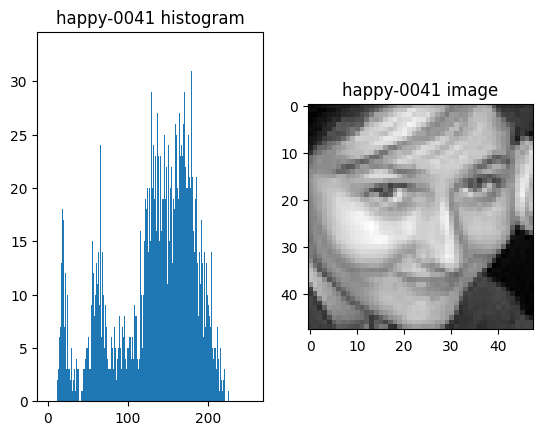

(134.1362847222222, 1817.3985298463356, -0.41147845091556706, -0.549558993905591, -5.176569347722855)
happy-0043 Matrix
    0   1   2   3   4   5   6    7    8    9    10   11   12   13   14   15  \
0   83  38  38  14   3   5   6    1    1   37   97  172  206  215  210  204   
1   71  42  38   8   0   0   2    1    5   36  133  211  215  217  219  209   
2   69  51  37   4   1   3   4    2    2   54  172  225  217  220  221  213   
3   73  54  31   2   1   2   5    1    5   82  198  221  219  224  221  215   
4   78  54  27   5   0   0   5    4   13   90  206  225  220  221  221  213   
5   85  54  23   6   2   0   6    4   13   93  206  224  218  216  220  213   
6   84  55  22   3   2   2   2    0   11   98  210  220  218  220  219  218   
7   81  60  29   5   3   2   0    2   11   94  211  224  219  222  218  218   
8   69  66  38  12   0   2   1    1   10   95  200  221  217  218  221  219   
9   58  56  39  19   1   2   1    2   13   75  201  222  224  223  222  218   
10  48  42 

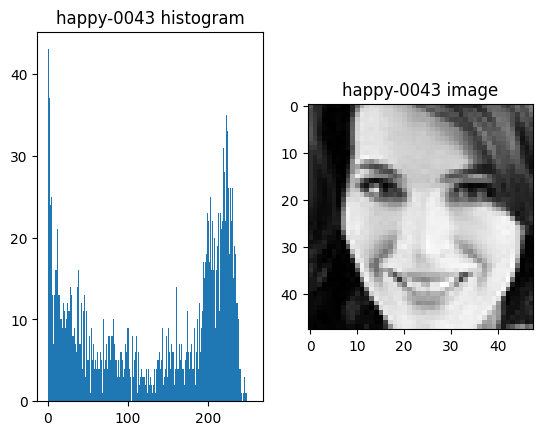

(128.96744791666666, 3258.41732232565, -0.27938414854556093, 0.1438400797616601, -4.982800568070178)
happy-0044 Matrix
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0    38   81   87   76   91   89   83   75   62   45   62   57   82  106  122   
1    62   87   74   78  100   85   87   68   61   54   68   70   90  118  134   
2    62   82   69   90   86   74   81   71   67   68   78   88   99  124  140   
3    60   68   79   89   78   85   67   78   64   70   78   95  104  123  142   
4    53   65   66   70   73   64   59   61   56   70   80   94  106  123  142   
5    63   68   54   68   57   44   61   47   62   83   94  101  113  129  145   
6    74   55   57   59   42   58   51   48   74   98  110  116  126  141  150   
7    61   57   62   47   46   62   49   60   87  107  119  130  136  145  149   
8    50   53   49   51   47   69   50   70   89  115  129  143  136  144  162   
9    48   47   36   38   60   62   45   68   92  119  145  146  145  14

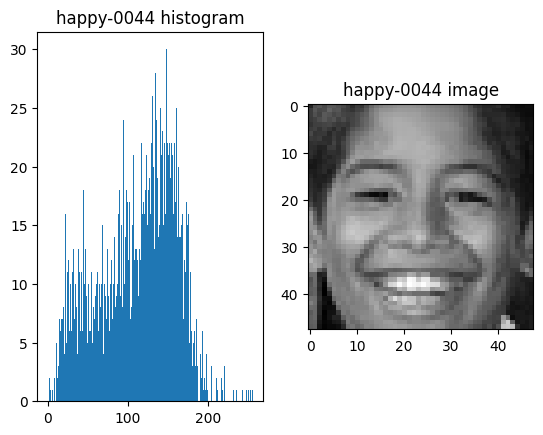

(111.24262152777779, 1080.0976747192672, 0.13067720389589702, 0.8620260205551175, -5.105250000954278)
Happy Expression First Order Statistics


,mean,variance,skewness,kurtosis,entropy
happy-0041,134.136285,1817.398530,-0.411478,-0.549559,-5.176569
happy-0043,128.967448,3258.417322,-0.279384,0.143840,-4.982801
happy-0044,111.242622,1080.097675,0.130677,0.862026,-5.105250


In [6]:
# menampilkan yang happy
labelsNameHappy = [f'happy-{p}' for p in assets['happy']]
happy_assets = assets['happy']
listStatisticsHappy = []

for expression, path in enumerate(happy_assets):
    pixels = displayImageToPixels('happy', path)
    print(f'happy-{path} Matrix')
    print(pixels)
    
    showColorHistogram(f'happy-{path}', pixels)
    
    stats = firstOrderStatistics(pixels)
    listStatisticsHappy.append(stats)
    print(stats)
    
happy = pd.DataFrame(listStatisticsHappy, index=labelsNameHappy, columns=['mean', 'variance', 'skewness', 'kurtosis', 'entropy'])

print("Happy Expression First Order Statistics")
happy


<h5>Neutral Image</h5>

neutral-0041 Matrix
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   252  253  255  252  255  251  254  251  248  196  120  107   94   99  117   
1   253  253  254  250  253  253  253  255  230  128  100   93  128  121  107   
2   255  251  250  253  255  254  250  253  153  100   94  105  103   67   55   
3   254  252  254  254  252  251  254  240  101  119   94   62   54   55   39   
4   252  253  254  253  253  253  254  195   86  125   61   63   61   48   37   
5   255  251  251  254  254  252  255  179  117   87   56   80   62   44   30   
6   254  253  254  255  249  249  254  179  138  103  114   76   51   47   40   
7   252  254  253  251  253  255  231  126  126  131  104   59   54   55   45   
8   254  251  250  254  252  255  196  105  115  116   80   44   58   59   47   
9   254  255  254  253  253  248  173   97  116   94   62   54   72   50   60   
10  251  252  254  252  250  255  168  124  140   90   57   65   72   53   55   
11  255 

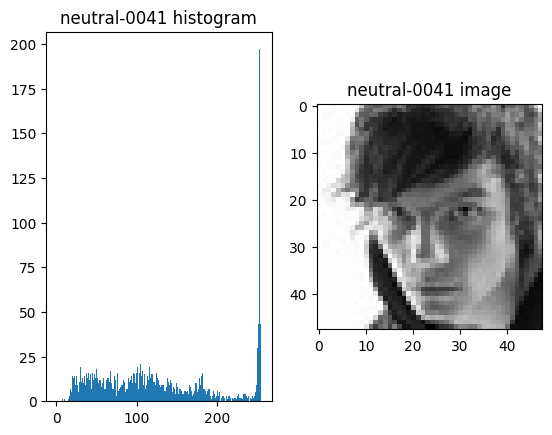

(130.02517361111111, 2532.1647458628845, -0.3543791203720749, 1.209912117514814, -4.789270478836176)
neutral-0043 Matrix
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   230  221  227  231  215  196  197  190  196  202  201  198  196  193  195   
1   217  218  223  215  208  200  188  186  198  208  210  206  204  203  202   
2   218  220  206  205  208  203  199  197  199  209  214  211  209  207  203   
3   215  215  198  205  208  205  206  200  202  207  212  211  206  200  196   
4   206  199  197  199  198  209  208  202  203  206  213  211  203  197  193   
5   207  202  194  197  210  215  207  209  198  203  214  210  203  203  199   
6   216  198  207  223  216  214  217  196  194  196  208  205  199  201  198   
7   200  204  218  211  218  218  203  207  195  191  200  199  193  192  188   
8   199  204  203  217  216  209  207  193  192  194  194  194  190  193  205   
9   201  196  196  201  196  200  193  195  189  187  186  196  201  

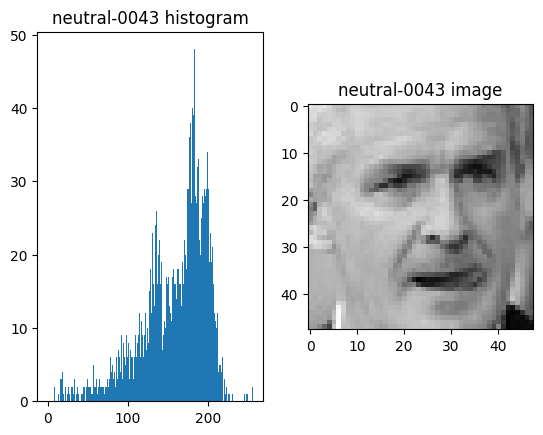

(158.24826388888889, 1089.2469895094562, -1.077301661962602, 1.8549690116154232, -5.031432528700825)
neutral-0049 Matrix
     0    1    2    3    4    5   6   7    8    9    10   11   12   13   14  \
0    13   10   13   16   15   20  17  22   27   32   51   70   91  109  123   
1    14   12   17   15   16   21  21  24   27   42   64   76   97  115  127   
2    14   14   21   14   17   22  23  23   31   58   78   84  104  122  131   
3    16   17   22   15   20   25  24  24   42   74   80   88  107  124  133   
4    19   20   20   19   24   28  22  29   60   86   73   89  106  121  131   
5    17   19   16   19   26   26  20  40   80   92   69   90  104  117  128   
6    16   17   14   20   31   23  22  58   96   93   74   91  106  115  127   
7    17   17   17   22   36   22  28  74  103   90   81   93  108  116  127   
8    17   20   18   27   38   18  41  79  106   86   82  100  107  118  129   
9    18   19   16   30   32   21  47  78  106   83   88  103  111  124  126   
10   20   

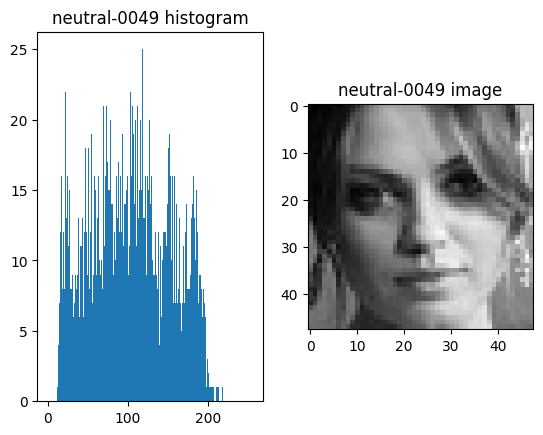

(104.36328125, 1412.9767194887709, -0.011844852788482846, -0.8663659440560565, -5.0910052878169365)
Happy Expression First Order Statistics


,mean,variance,skewness,kurtosis,entropy
neutral-0041,130.025174,2532.164746,-0.354379,1.209912,-4.789270
neutral-0043,158.248264,1089.246990,-1.077302,1.854969,-5.031433
neutral-0049,104.363281,1412.976719,-0.011845,-0.866366,-5.091005


In [7]:
# menampilkan yang neutral

labelsNameNeutral = [f'neutral-{p}' for p in assets['neutral']]
neutral_assets = assets['neutral']
listStatisticsNeutral = []

for expression, path in enumerate(neutral_assets):
    pixels = displayImageToPixels('neutral', path)
    print(f'neutral-{path} Matrix')
    print(pixels)
    
    showColorHistogram(f'neutral-{path}', pixels)
    
    stats = firstOrderStatistics(pixels)
    listStatisticsNeutral.append(stats)
    print(stats)
    
neutral = pd.DataFrame(listStatisticsNeutral, index=labelsNameNeutral, columns=['mean', 'variance', 'skewness', 'kurtosis', 'entropy'])

print("Happy Expression First Order Statistics")
neutral


<h5>Sad Image</h5>

sad-0041 Matrix
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   193  199  197  199  172   30   35   34   34   33   34   36   34   33   34   
1   200  193  195  201  196   66   24   39   36   33   33   35   34   35   35   
2   197  200  196  194  206  155   35   38   41   37   37   37   37   38   38   
3   198  194  198  199  193  212  108   22   39   37   37   38   37   38   39   
4   198  200  195  195  196  212   94   25   36   36   39   40   40   41   42   
5   200  201  197  198  207  177   33   37   40   41   43   43   42   42   43   
6   199  200  198  200  198  106   29   43   42   41   41   40   38   39   40   
7   203  196  197  198  148   47   34   41   41   40   38   37   37   40   41   
8   201  198  199  169   75   38   40   40   39   41   38   37   42   42   39   
9   200  203  192  102   38   44   37   44   41   48   38   38   41   38   44   
10  203  197  135   62   58   53   39   41   42   48   40   39   41   39   44   
11  202  168

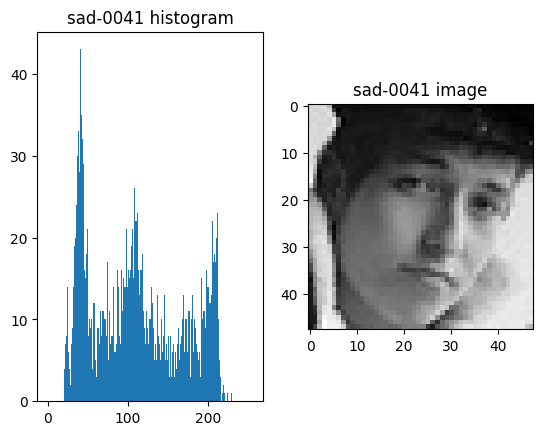

(111.01866319444446, 2701.986083407211, -0.2750765526760987, -0.8726175996574499, -5.067434755487746)
sad-0048 Matrix
     0    1    2   3    4   5    6   7    8    9    10   11   12   13   14  \
0    45   60   57  69   64  67   65  83   96   91   93  100  109  114  125   
1    57   56   54  69   63  68   71  89   91   94   98  102  107  112  125   
2    56   48   57  70   60  68   79  94   92   97  100  103  116  125  133   
3    50   44   63  70   59  72   86  92   93   99  101  106  127  139  141   
4    48   43   66  71   68  81   91  88   91  100  105  112  130  137  136   
5    41   43   67  77   87  87   91  89   93  100  107  115  127  128  128   
6    41   50   68  77   99  90   90  92   95   98  106  116  125  123  126   
7    55   62   66  69  102  93   90  93   94   95  106  118  124  121  129   
8    51   72   61  68   86  91   92  91   95   99  103  105  107  110  116   
9    63   71   61  68   74  89   90  90   95   97   97   96   98  105  113   
10   48   65   64  69   

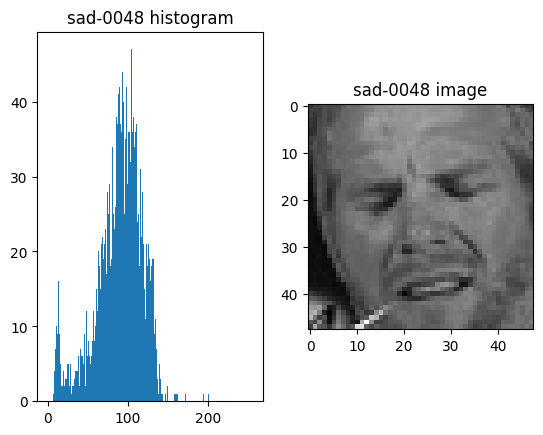

(89.52256944444446, 563.9804964539007, -0.49703969919241536, 0.8133262804357929, -4.917683309935801)
sad-0050 Matrix
     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0    24   28   44   38   30   47  106  129  167  138   67  106  105   74   45   
1    21   18   29   31   42   96  117  154  150   65   86  114   89   40   53   
2    28   36   35   27   89  129  144  125   51   61  112  109   67   39   65   
3    33   40   39   75  120  133  115   35   43   84  121   97   39   57   88   
4    18   26   61  120  128  122   30   24   62   98  124   54   43   77   74   
5     5   43  107  119  118   40   14   39   74  133  105   30   58   94   69   
6    26   89   64   71   47    6   33   46  101  145   58   48   79   92   49   
7    85  109  121   84    6   30   35   69  126  125   47   58   72   85   37   
8   124  151  141   45   23   30   47   83  136  101   35   65   77   81   44   
9   126  122   97   37   31   41   54  107  128   81   48   69   79   74 

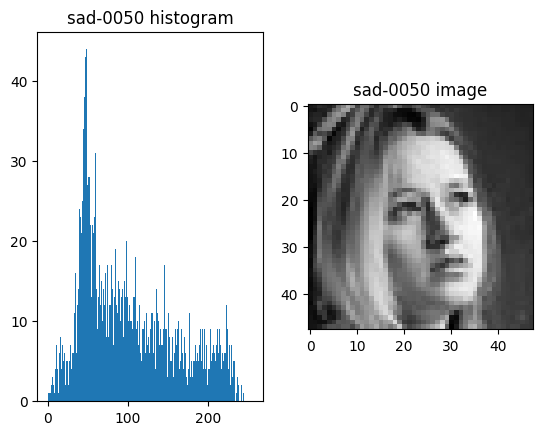

(101.66102430555554, 2134.987320848109, -0.009510879535014635, -0.6023792939692322, -5.070170457369721)
Happy Expression First Order Statistics


,mean,variance,skewness,kurtosis,entropy
sad-0041,111.018663,2701.986083,-0.275077,-0.872618,-5.067435
sad-0048,89.522569,563.980496,-0.497040,0.813326,-4.917683
sad-0050,101.661024,2134.987321,-0.009511,-0.602379,-5.070170


In [8]:
# menampilkan yang sad
labelsNameSad = [f'sad-{p}' for p in assets['sad']]
sad_assets = assets['sad']
listStatisticsSad = []

for expression, path in enumerate(sad_assets):
    pixels = displayImageToPixels('sad', path)
    print(f'sad-{path} Matrix')
    print(pixels)
    
    showColorHistogram(f'sad-{path}', pixels)
    
    stats = firstOrderStatistics(pixels)
    listStatisticsSad.append(stats)
    print(stats)
    
sad = pd.DataFrame(listStatisticsSad, index=labelsNameSad, columns=['mean', 'variance', 'skewness', 'kurtosis', 'entropy'])

print("Happy Expression First Order Statistics")
sad


<h4>Texture Analysis Function</h4>

<h5>GLCM Function</h5>

In [9]:
from skimage.feature import graycomatrix, graycoprops

In [10]:
def calculationGLCM(pixels, dist = [1], angles = [0, np.pi / 4, np.pi / 3, 3 * np.pi / 4], sym = True, norm = True):
    glcm = graycomatrix (
                pixels, 
                distances = dist, 
                angles = angles, 
                symmetric = sym, 
                normed = norm
            )
    return glcm

In [11]:
def featuresGLCM(glcmMatrix: list, props: list) -> list:
    return np.array([property for p in props for property in graycoprops(glcmMatrix, prop=p)]).ravel()

In [12]:
def histogramTexture(title: str, glcmMatrix: list):
    fig, axs = plt.subplots(1, 4, figsize=(12, 6))
    angles = [0, 45, 90, 135]
    for i in range(4):
        axs[i].hist(glcmMatrix[:, :, 0, i])
        axs[i].set_title(f'{title}_{angles[i]}', fontsize=10)
    plt.tight_layout()
    plt.show()  

In [13]:
def printHistogram(expression : str, labels : list, assets : list):
    pixels = displayImageToPixels(expression, assets)
    glcmMatrix = calculationGLCM(pixels)
    histogramTexture(labels, glcmMatrix)

<h5>Display GLCM Histogram Happy Expression</h5>

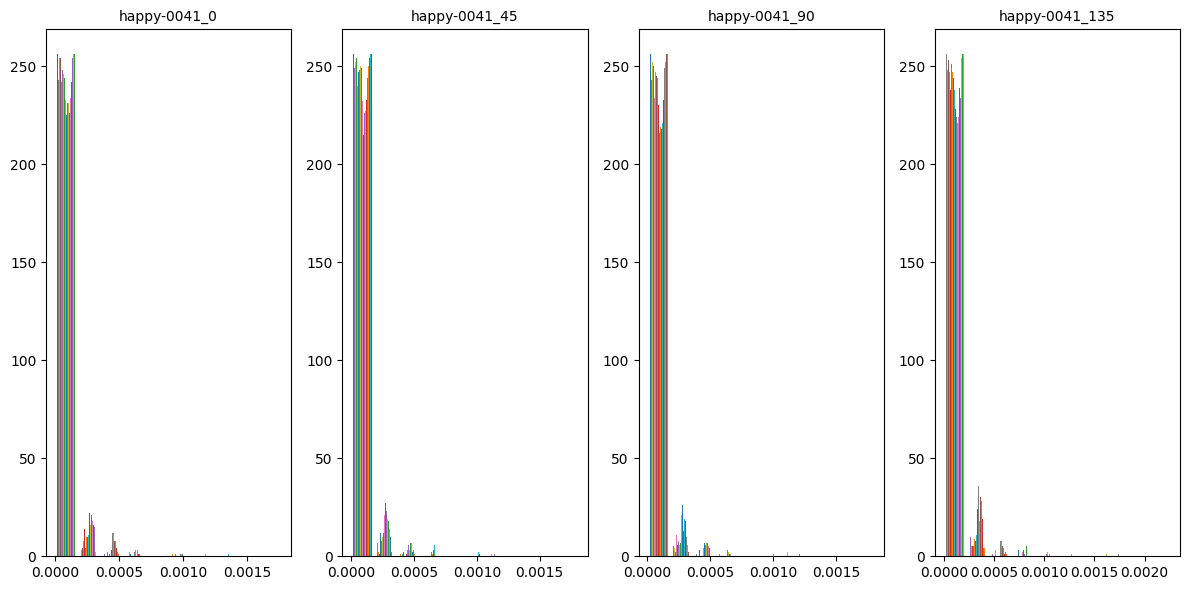

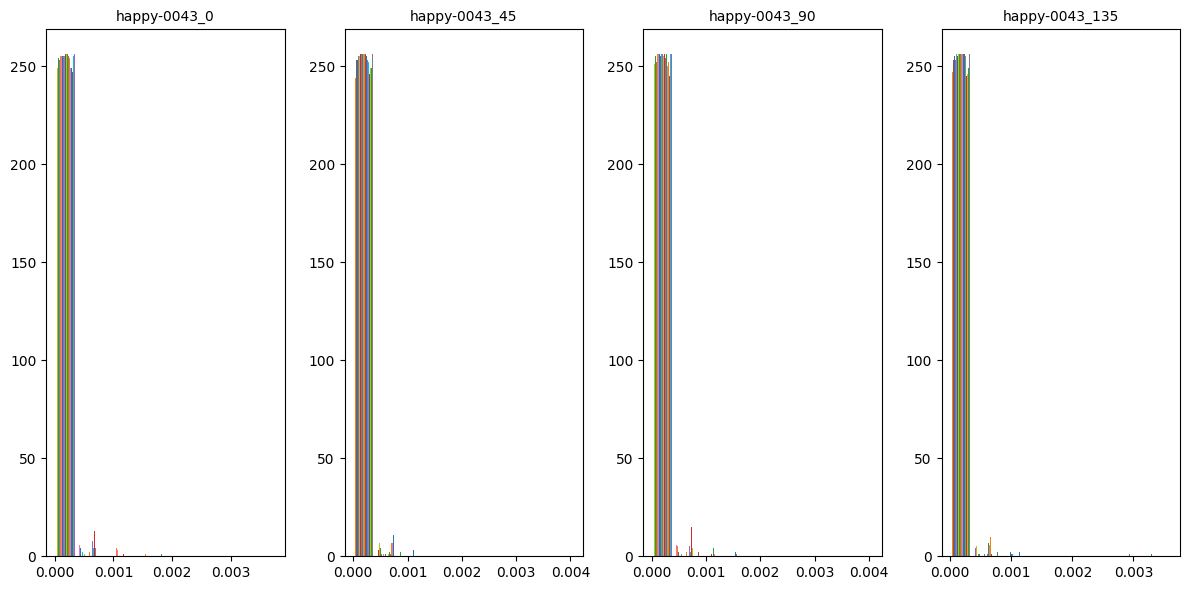

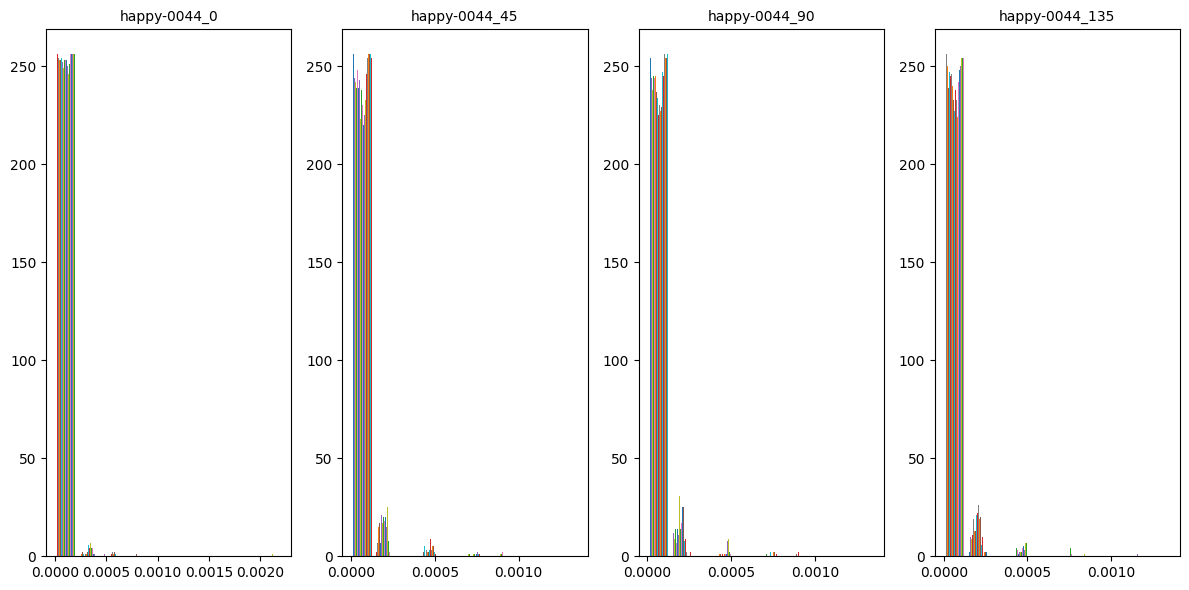

In [14]:
for i in range(len(labelsNameHappy)):
    printHistogram('happy', labelsNameHappy[i], happy_assets[i])

<h5>Display GLCM Histogram Neutral Expression</h5>

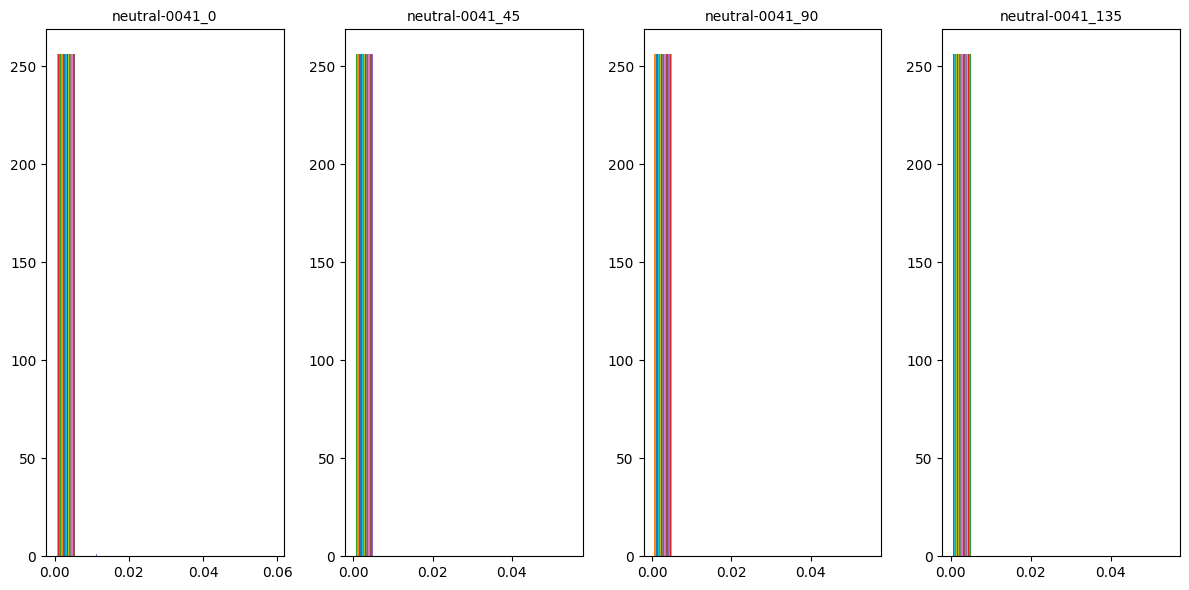

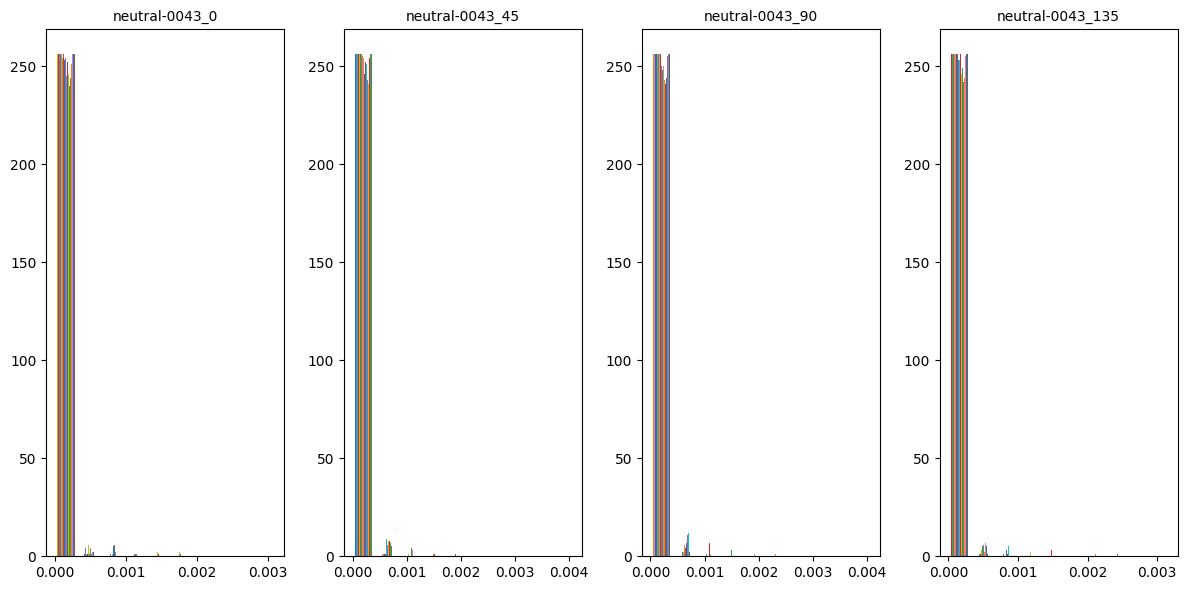

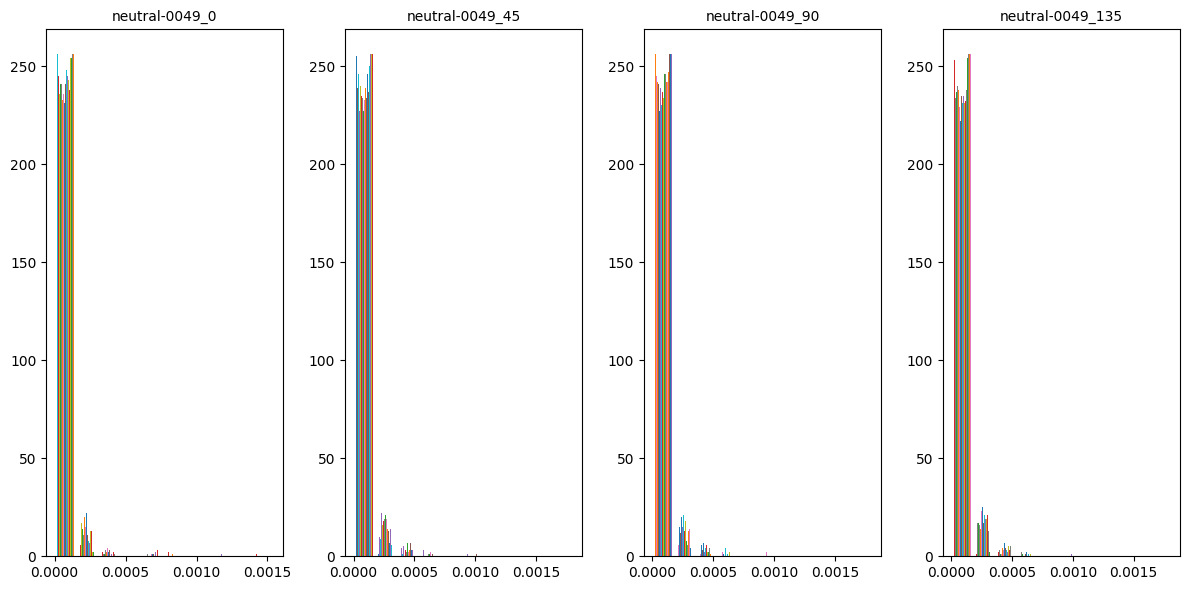

In [15]:
for i in range(len(labelsNameNeutral)):
    printHistogram('neutral', labelsNameNeutral[i], neutral_assets[i])

<h5>Display GLCM Histogram Sad Expression</h5>

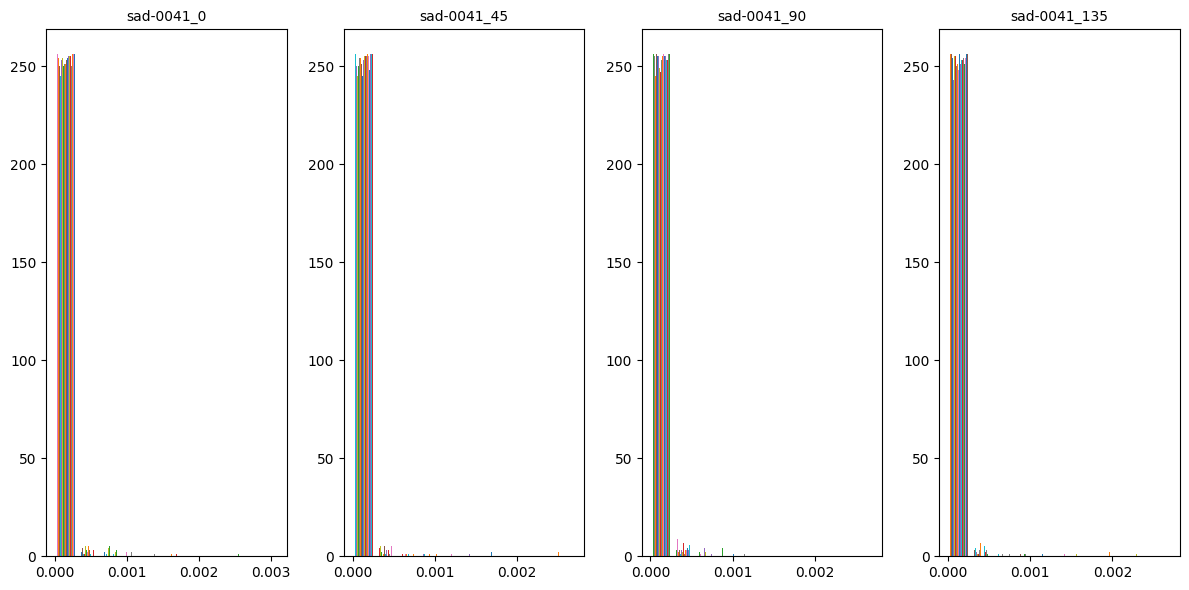

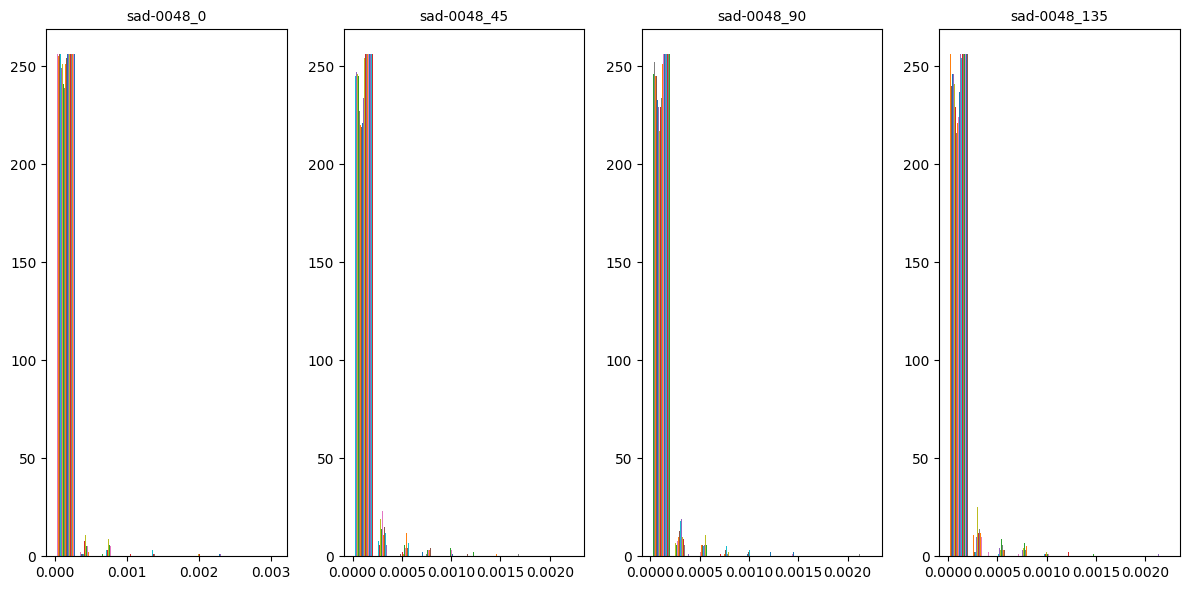

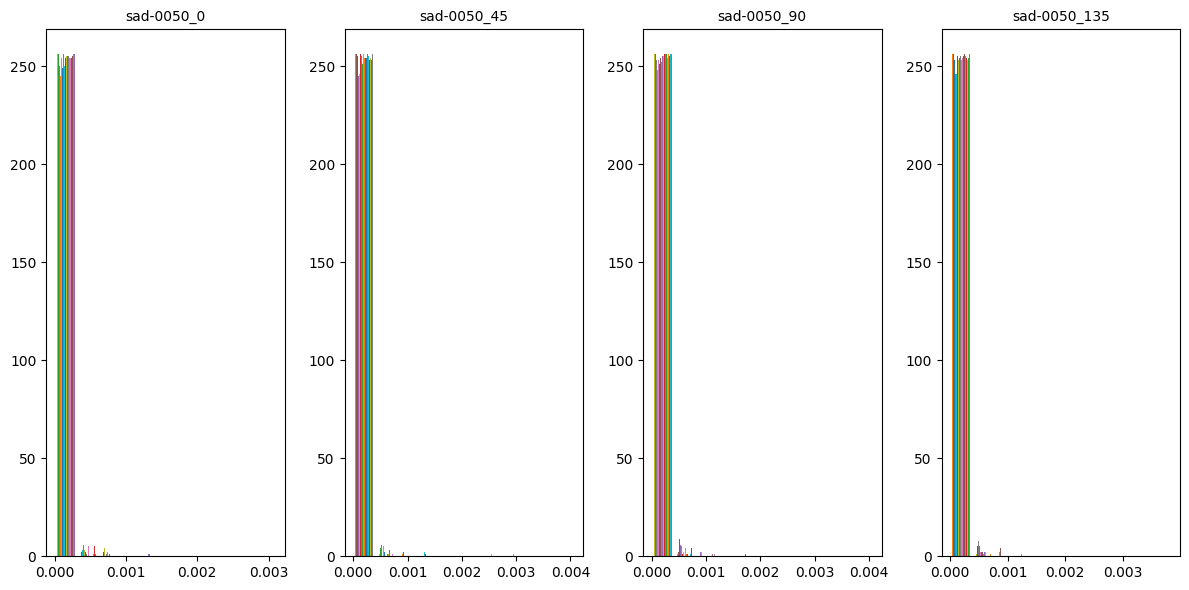

In [18]:
for i in range(len(labelsNameSad)):
    printHistogram('sad', labelsNameSad[i], sad_assets[i])

<h5>Menampilkan Dengan Table View</h5>

In [19]:
def showGlcmStatisticsWithTable() -> pd.DataFrame:
    props = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
    featureResult = list()

    for expression in assets:
        for path in assets[expression]:
            pixels = displayImageToPixels(expression, path)
            glcmMatrix = calculationGLCM(pixels)
            featureResult.append(featuresGLCM(glcmMatrix, props))

    angles = [0, 45, 90, 135]
    labels = list()
    index = list()

    for prop in props:
        for angle in angles:
            labels.append(f'{prop}_{angle}')
    
    for expression in assets:
        for path in assets[expression]:
            index.append(f'{expression}-{path}')
    
    return pd.DataFrame (
        featureResult, 
        index = index, 
        columns = labels
    )


In [20]:
showGlcmStatisticsWithTable()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
happy-0041,11.499113,16.397465,16.397465,14.714803,0.944799,0.882266,0.882266,0.905519,0.108511,0.086348,0.086348,0.091522,272.754433,574.396560,574.396560,460.629697,0.000411,0.000382,0.000382,0.000382,0.020264,0.019534,0.019534,0.019537
happy-0043,18.467642,20.635129,20.635129,23.790403,0.924517,0.905993,0.905993,0.885848,0.117654,0.112240,0.112240,0.104619,1106.886082,1378.200543,1378.200543,1674.238569,0.000498,0.000486,0.000486,0.000483,0.022309,0.022055,0.022055,0.021987
happy-0044,12.812500,17.719330,17.719330,18.273427,0.921618,0.850792,0.850792,0.834190,0.097456,0.080636,0.080636,0.072090,356.408245,676.604799,676.604799,751.704844,0.000368,0.000331,0.000331,0.000343,0.019186,0.018181,0.018181,0.018525
neutral-0041,18.753546,21.186057,21.186057,21.565414,0.913995,0.906062,0.906062,0.878346,0.153812,0.141565,0.141565,0.147984,979.491135,1068.541421,1068.541421,1384.134903,0.004066,0.003641,0.003641,0.003625,0.063768,0.060337,0.060337,0.060204
neutral-0043,10.173316,15.196469,15.196469,12.980987,0.931252,0.844750,0.844750,0.875374,0.137195,0.109264,0.109264,0.115060,238.363918,533.407424,533.407424,427.001811,0.000566,0.000490,0.000490,0.000506,0.023794,0.022126,0.022126,0.022505
neutral-0049,13.331117,14.317338,14.317338,17.636940,0.926563,0.911171,0.911171,0.881341,0.105764,0.097662,0.097662,0.077080,370.829344,449.727931,449.727931,600.464464,0.000371,0.000358,0.000358,0.000327,0.019268,0.018927,0.018927,0.018085
sad-0041,12.292110,14.778633,14.778633,14.293345,0.921887,0.900189,0.900189,0.904366,0.173658,0.134384,0.134384,0.142656,524.917996,661.000453,661.000453,633.476686,0.000566,0.000477,0.000477,0.000494,0.023796,0.021830,0.021830,0.022226
sad-0048,9.283688,11.975555,11.975555,11.964237,0.862652,0.760358,0.760358,0.809185,0.135298,0.112673,0.112673,0.111783,220.049645,383.518334,383.518334,305.412856,0.000634,0.000552,0.000552,0.000539,0.025174,0.023505,0.023505,0.023227
sad-0050,18.128546,20.909914,20.909914,21.119964,0.893465,0.854658,0.854658,0.847032,0.117186,0.116717,0.116717,0.099265,736.707447,1010.434586,1010.434586,1063.687641,0.000486,0.000483,0.000483,0.000452,0.022052,0.021982,0.021982,0.021262
